In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv("train.csv")
df_train

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male
...,...,...,...,...,...
10495,u15442,18/11/14 7:39,18/11/14 7:42,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,female
10496,u17986,25/11/14 15:16,25/11/14 15:16,A00006/B00030/C00334/D11660/,female
10497,u22508,09/12/14 10:11,09/12/14 10:11,A00002/B00002/C00007/D18028/,female
10498,u17087,22/11/14 11:27,22/11/14 11:27,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,female


In [103]:
df_cat = pd.DataFrame(df_train.ProductList.str.split('/',1).tolist(),
                                   columns = ['category1','rest'])
df_cat

,category1,rest
0,A00002,B00003/C00006/D28435/;A00002/B00003/C00006/D02...
1,A00001,B00009/C00031/D29404/;A00001/B00009/C00031/D02...
2,A00002,B00001/C00020/D16944/
3,A00002,B00004/C00018/D10284/;A00002/B00004/C00018/D10...
4,A00001,B00001/C00012/D30805/;A00001/B00001/C00012/D30...
...,...,...
10495,A00002,B00002/C00007/D06407/;A00002/B00002/C00007/D06...
10496,A00006,B00030/C00334/D11660/
10497,A00002,B00002/C00007/D18028/
10498,A00003,B00012/C00131/D09453/;A00003/B00012/C00073/D09...


In [3]:
df_train['cayegory1'] = df_train['ProductList'].map(lambda x: x[:6]).str.rsplit('; ', 1 )

In [4]:
df_train['Count'] = df_train['ProductList'].apply(lambda x: len(x.split(';')))
df_train

,session_id,startTime,endTime,ProductList,gender,cayegory1,Count
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,[A00002],4
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,[A00001],7
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,[A00002],1
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,[A00002],3
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,[A00001],2
...,...,...,...,...,...,...,...
10495,u15442,18/11/14 7:39,18/11/14 7:42,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,female,[A00002],2
10496,u17986,25/11/14 15:16,25/11/14 15:16,A00006/B00030/C00334/D11660/,female,[A00006],1
10497,u22508,09/12/14 10:11,09/12/14 10:11,A00002/B00002/C00007/D18028/,female,[A00002],1
10498,u17087,22/11/14 11:27,22/11/14 11:27,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,female,[A00003],2


In [5]:
#change gender to binary encoding
df_train['gender']= df_train['gender'].map({'female': 0, 'male': 1})
df_train

,session_id,startTime,endTime,ProductList,gender,cayegory1,Count
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,[A00002],4
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,1,[A00001],7
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,0,[A00002],1
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,0,[A00002],3
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,1,[A00001],2
...,...,...,...,...,...,...,...
10495,u15442,18/11/14 7:39,18/11/14 7:42,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,0,[A00002],2
10496,u17986,25/11/14 15:16,25/11/14 15:16,A00006/B00030/C00334/D11660/,0,[A00006],1
10497,u22508,09/12/14 10:11,09/12/14 10:11,A00002/B00002/C00007/D18028/,0,[A00002],1
10498,u17087,22/11/14 11:27,22/11/14 11:27,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,0,[A00003],2


In [6]:
df2 = df_train

In [7]:
#add weekday and time diff
df2['startTime'] = pd.to_datetime(df2['startTime'])
df2['endTime'] = pd.to_datetime(df2['endTime'])

df2['day_of_week'] = df2['startTime'].dt.day_name()
df2['weekday'] = df2['startTime'].dt.dayofweek
df2['td'] = df2['endTime']-df2['startTime']

df2 = df2.drop('day_of_week',axis = 1)

#change td to seconds
df2['td'] = df2['td'].dt.total_seconds()
df2

,session_id,startTime,endTime,ProductList,gender,cayegory1,Count,weekday,td
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,[A00002],4,0,60.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,1,[A00001],7,1,360.0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,0,[A00002],1,6,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,0,[A00002],3,6,180.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,1,[A00001],2,2,120.0
...,...,...,...,...,...,...,...,...,...
10495,u15442,2014-11-18 07:39:00,2014-11-18 07:42:00,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,0,[A00002],2,1,180.0
10496,u17986,2014-11-25 15:16:00,2014-11-25 15:16:00,A00006/B00030/C00334/D11660/,0,[A00006],1,1,0.0
10497,u22508,2014-09-12 10:11:00,2014-09-12 10:11:00,A00002/B00002/C00007/D18028/,0,[A00002],1,4,0.0
10498,u17087,2014-11-22 11:27:00,2014-11-22 11:27:00,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,0,[A00003],2,5,0.0


In [9]:
df2 = (df_train.set_index('session_id')
             .ProductList.str.split(';', expand=True)
             .stack()
             .reset_index(level=1, drop=True)
             .reset_index(name='ProductList'))
df2

,session_id,ProductList
0,u16159,A00002/B00003/C00006/D28435/
1,u16159,A00002/B00003/C00006/D02554/
2,u16159,A00002/B00003/C00006/D28436/
3,u16159,A00002/B00003/C00006/D28437/
4,u10253,A00001/B00009/C00031/D29404/
...,...,...
23246,u17087,A00003/B00012/C00073/D09454/
23247,u23137,A00002/B00001/C00010/D02309/
23248,u23137,A00002/B00002/C00002/D32450/
23249,u23137,A00002/B00001/C00059/D21254/


In [13]:
df3 = pd.DataFrame(df2.ProductList.str.split('/',1).tolist(),
                                   columns = ['category','sub_category'])
df3

,category,sub_category
0,A00002,B00003/C00006/D28435/
1,A00002,B00003/C00006/D02554/
2,A00002,B00003/C00006/D28436/
3,A00002,B00003/C00006/D28437/
4,A00001,B00009/C00031/D29404/
...,...,...
23246,A00003,B00012/C00073/D09454/
23247,A00002,B00001/C00010/D02309/
23248,A00002,B00002/C00002/D32450/
23249,A00002,B00001/C00059/D21254/


In [23]:
# df2['ProductList'] = df2['ProductList'].astype('str')
df2['Category'] = df2['ProductList'].str[:20]
df2

,session_id,ProductList,Category
0,u16159,A00002/B00003/C00006/D28435/,A00002/B00003/C00006
1,u16159,A00002/B00003/C00006/D02554/,A00002/B00003/C00006
2,u16159,A00002/B00003/C00006/D28436/,A00002/B00003/C00006
3,u16159,A00002/B00003/C00006/D28437/,A00002/B00003/C00006
4,u10253,A00001/B00009/C00031/D29404/,A00001/B00009/C00031
...,...,...,...
23246,u17087,A00003/B00012/C00073/D09454/,A00003/B00012/C00073
23247,u23137,A00002/B00001/C00010/D02309/,A00002/B00001/C00010
23248,u23137,A00002/B00002/C00002/D32450/,A00002/B00002/C00002
23249,u23137,A00002/B00001/C00059/D21254/,A00002/B00001/C00059


In [10]:
df3 = df2.groupby(['session_id']).count().reset_index()
df3.columns = ['session_id', 'count']
df3

,session_id,count
0,u10001,1
1,u10002,1
2,u10003,12
3,u10004,1
4,u10005,3
...,...,...
10495,u24994,9
10496,u24995,8
10497,u24996,3
10498,u24997,4


In [11]:
#merge count & product list
df2 = pd.merge(df2, df3[['session_id','count']],how='left',on=['session_id'])
df2

,session_id,ProductList,count
0,u16159,A00002/B00003/C00006/D28435/,4
1,u16159,A00002/B00003/C00006/D02554/,4
2,u16159,A00002/B00003/C00006/D28436/,4
3,u16159,A00002/B00003/C00006/D28437/,4
4,u10253,A00001/B00009/C00031/D29404/,7
...,...,...,...
23246,u17087,A00003/B00012/C00073/D09454/,2
23247,u23137,A00002/B00001/C00010/D02309/,4
23248,u23137,A00002/B00002/C00002/D32450/,4
23249,u23137,A00002/B00001/C00059/D21254/,4


In [12]:
#merge to get other details
df2 = pd.merge(df2, df_train[['session_id', 'startTime','endTime', 'gender']],how='left',on=['session_id'])
df2

,session_id,ProductList,count,startTime,endTime,gender
0,u16159,A00002/B00003/C00006/D28435/,4,15/12/14 18:11,15/12/14 18:12,female
1,u16159,A00002/B00003/C00006/D02554/,4,15/12/14 18:11,15/12/14 18:12,female
2,u16159,A00002/B00003/C00006/D28436/,4,15/12/14 18:11,15/12/14 18:12,female
3,u16159,A00002/B00003/C00006/D28437/,4,15/12/14 18:11,15/12/14 18:12,female
4,u10253,A00001/B00009/C00031/D29404/,7,16/12/14 14:35,16/12/14 14:41,male
...,...,...,...,...,...,...
23246,u17087,A00003/B00012/C00073/D09454/,2,22/11/14 11:27,22/11/14 11:27,female
23247,u23137,A00002/B00001/C00010/D02309/,4,19/12/14 3:11,19/12/14 3:19,female
23248,u23137,A00002/B00002/C00002/D32450/,4,19/12/14 3:11,19/12/14 3:19,female
23249,u23137,A00002/B00001/C00059/D21254/,4,19/12/14 3:11,19/12/14 3:19,female


In [8]:
#change gender to binary encoding
df2['gender']= df2['gender'].map({ 0: 'female', 1:'male'})
df2

,session_id,startTime,endTime,ProductList,gender,cayegory1,Count,weekday,td
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,[A00002],4,0,60.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,[A00001],7,1,360.0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,female,[A00002],1,6,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,[A00002],3,6,180.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,[A00001],2,2,120.0
...,...,...,...,...,...,...,...,...,...
10495,u15442,2014-11-18 07:39:00,2014-11-18 07:42:00,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,female,[A00002],2,1,180.0
10496,u17986,2014-11-25 15:16:00,2014-11-25 15:16:00,A00006/B00030/C00334/D11660/,female,[A00006],1,1,0.0
10497,u22508,2014-09-12 10:11:00,2014-09-12 10:11:00,A00002/B00002/C00007/D18028/,female,[A00002],1,4,0.0
10498,u17087,2014-11-22 11:27:00,2014-11-22 11:27:00,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,female,[A00003],2,5,0.0


In [13]:
#add weekday and time diff
df2['startTime'] = pd.to_datetime(df2['startTime'])
df2['endTime'] = pd.to_datetime(df2['endTime'])

df2['day_of_week'] = df2['startTime'].dt.day_name()
df2['weekday'] = df2['startTime'].dt.dayofweek
df2['td'] = df2['endTime']-df2['startTime']

df2 = df2.drop('day_of_week',axis = 1)

#change td to seconds
df2['td'] = df2['td'].dt.total_seconds()
df2

,session_id,startTime,endTime,ProductList,gender,cayegory1,Count,weekday,td
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,NaN,[A00002],4,0,60.0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,NaN,[A00001],7,1,360.0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,NaN,[A00002],1,6,0.0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,NaN,[A00002],3,6,180.0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,NaN,[A00001],2,2,120.0
...,...,...,...,...,...,...,...,...,...
10495,u15442,2014-11-18 07:39:00,2014-11-18 07:42:00,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,NaN,[A00002],2,1,180.0
10496,u17986,2014-11-25 15:16:00,2014-11-25 15:16:00,A00006/B00030/C00334/D11660/,NaN,[A00006],1,1,0.0
10497,u22508,2014-09-12 10:11:00,2014-09-12 10:11:00,A00002/B00002/C00007/D18028/,NaN,[A00002],1,4,0.0
10498,u17087,2014-11-22 11:27:00,2014-11-22 11:27:00,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,NaN,[A00003],2,5,0.0


In [16]:
df2.cayegory1.value_counts()

[A00002]    6724
[A00001]    1584
[A00003]    1575
[A00005]     201
[A00004]     140
[A00006]     106
[A00011]      49
[A00010]      46
[A00009]      27
[A00007]      26
[A00008]      22
Name: cayegory1, dtype: int64

In [8]:
df2['cayegory1'] = tuple(df2['cayegory1'])

In [9]:
#one hot encoding
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df2['cayegory1'])

# Drop column B as it is now encoded
df2 = df2.drop('cayegory1',axis = 1)

# Join the encoded df
df2 = df2.join(one_hot)
df2

,session_id,startTime,endTime,ProductList,gender,Count,weekday,td,"(A00001,)","(A00002,)","(A00003,)","(A00004,)","(A00005,)","(A00006,)","(A00007,)","(A00008,)","(A00009,)","(A00010,)","(A00011,)"
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,4,0,60.0,0,1,0,0,0,0,0,0,0,0,0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,1,7,1,360.0,1,0,0,0,0,0,0,0,0,0,0
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,0,1,6,0.0,0,1,0,0,0,0,0,0,0,0,0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,0,3,6,180.0,0,1,0,0,0,0,0,0,0,0,0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,1,2,2,120.0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,u15442,2014-11-18 07:39:00,2014-11-18 07:42:00,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,0,2,1,180.0,0,1,0,0,0,0,0,0,0,0,0
10496,u17986,2014-11-25 15:16:00,2014-11-25 15:16:00,A00006/B00030/C00334/D11660/,0,1,1,0.0,0,0,0,0,0,1,0,0,0,0,0
10497,u22508,2014-09-12 10:11:00,2014-09-12 10:11:00,A00002/B00002/C00007/D18028/,0,1,4,0.0,0,1,0,0,0,0,0,0,0,0,0
10498,u17087,2014-11-22 11:27:00,2014-11-22 11:27:00,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,0,2,5,0.0,0,0,1,0,0,0,0,0,0,0,0


In [10]:
X = df2.loc[:, ~df2.columns.isin(['session_id','ProductList', 'startTime', 'endTime', 'gender'])]
X

,Count,weekday,td,"(A00001,)","(A00002,)","(A00003,)","(A00004,)","(A00005,)","(A00006,)","(A00007,)","(A00008,)","(A00009,)","(A00010,)","(A00011,)"
0,4,0,60.0,0,1,0,0,0,0,0,0,0,0,0
1,7,1,360.0,1,0,0,0,0,0,0,0,0,0,0
2,1,6,0.0,0,1,0,0,0,0,0,0,0,0,0
3,3,6,180.0,0,1,0,0,0,0,0,0,0,0,0
4,2,2,120.0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,2,1,180.0,0,1,0,0,0,0,0,0,0,0,0
10496,1,1,0.0,0,0,0,0,0,1,0,0,0,0,0
10497,1,4,0.0,0,1,0,0,0,0,0,0,0,0,0
10498,2,5,0.0,0,0,1,0,0,0,0,0,0,0,0


In [49]:
import xgboost as xgb
from   xgboost import XGBClassifier

In [74]:
# Fitting Random Forest Classifier
X_train = X
Y_train = df2["gender"]
X_test  = X1

# Fitting Random Forest Classification to Training set
random_forest = RandomForestClassifier(n_estimators=100)
lr = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier()
mlp = MLPClassifier()
xgb = XGBClassifier(n_estimators=750,learning_rate=0.02,max_depth=3)
gau = GaussianNB()
svc = SVC()
gbc = GradientBoostingClassifier()

gbc.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
Y_prediction = gbc.predict(X1)

In [76]:
predicted_gender = list(Y_prediction)

In [77]:
new_id = df21.iloc[:, 0]
df_file = pd.DataFrame({'session_id':new_id, 'gender': predicted_gender})

In [78]:
#merge count & product list
df211p = pd.merge(df_test, df_file[['session_id','gender']],how='left',on=['session_id'])

In [79]:
df_sub = df211p.loc[:, df211p.columns.isin(['session_id', 'gender'])]
# df_sub.reset_index(drop=True)
df_sub = df_sub.set_index('session_id')

In [80]:
#change gender to binary encoding
df_sub['gender']= df_sub['gender'].map({ 0: 'female', 1 : 'male'})

In [81]:
df_sub.to_csv('submission_gbc1.csv')

In [40]:
len(df_test)

4500

In [42]:
len(df_file)

10204

In [41]:
df211p.gender.value_counts()

0    4395
1     105
Name: gender, dtype: int64

In [14]:
#one hot encoding
df21['cayegory1'] = tuple(df21['cayegory1'])
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df21['cayegory1'])

# Drop column B as it is now encoded
df21 = df21.drop('cayegory1',axis = 1)

# Join the encoded df
df21 = df21.join(one_hot)
df21

,session_id,startTime,endTime,ProductList,Count,weekday,td,"(A00001,)","(A00002,)","(A00003,)","(A00004,)","(A00005,)","(A00006,)","(A00007,)","(A00008,)","(A00009,)","(A00010,)","(A00011,)"
0,u12112,2014-08-12 13:36:00,2014-08-12 13:36:00,A00002/B00003/C00006/D19956/,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0
1,u19725,2014-12-19 13:52:00,2014-12-19 13:52:00,A00002/B00005/C00067/D02026/,1,4,0.0,0,1,0,0,0,0,0,0,0,0,0
2,u11795,2014-01-12 10:44:00,2014-01-12 10:44:00,A00002/B00002/C00004/D12538/,1,6,0.0,0,1,0,0,0,0,0,0,0,0,0
3,u22639,2014-08-12 20:19:00,2014-08-12 20:22:00,A00002/B00003/C00079/D22781/;A00002/B00003/C00...,4,1,180.0,0,1,0,0,0,0,0,0,0,0,0
4,u18034,2014-12-15 19:33:00,2014-12-15 19:33:00,A00002/B00001/C00010/D23419/,1,0,0.0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,u23966,2014-12-15 21:11:00,2014-12-15 21:12:00,A00001/B00031/C00044/D03435/;A00001/B00031/C00...,3,0,60.0,1,0,0,0,0,0,0,0,0,0,0
4496,u20527,2014-02-12 07:53:00,2014-02-12 07:54:00,A00002/B00002/C00004/D17474/;A00002/B00002/C00...,2,2,60.0,0,1,0,0,0,0,0,0,0,0,0
4497,u13253,2014-11-15 21:38:00,2014-11-15 21:46:00,A00002/B00007/C00098/D03350/;A00002/B00007/C00...,9,5,480.0,0,1,0,0,0,0,0,0,0,0,0
4498,u17094,2014-12-17 08:51:00,2014-12-17 08:51:00,A00001/B00031/C00044/D09604/,1,2,0.0,1,0,0,0,0,0,0,0,0,0,0


In [25]:
df21 = (df_test.set_index('session_id')
             .ProductList.str.split(';', expand=True)
             .stack()
             .reset_index(level=1, drop=True)
             .reset_index(name='ProductList'))
df21

df31 = df21.groupby(['session_id']).count().reset_index()
df31.columns = ['session_id', 'count']
df31

#merge count & product list
df21 = pd.merge(df21, df31[['session_id','count']],how='left',on=['session_id'])
df21

#merge to get other details
df21 = pd.merge(df21, df_test[['session_id', 'startTime','endTime']],how='left',on=['session_id'])
df21


#add weekday and time diff
df21['startTime'] = pd.to_datetime(df21['startTime'])
df21['endTime'] = pd.to_datetime(df21['endTime'])

df21['day_of_week'] = df21['startTime'].dt.day_name()
df21['weekday'] = df21['startTime'].dt.dayofweek
df21['td'] = df21['endTime']-df21['startTime']

df21 = df21.drop('day_of_week',axis = 1)

#change td to seconds
df21['td'] = df21['td'].dt.total_seconds()
df21

,session_id,ProductList,count,startTime,endTime,weekday,td
0,u12112,A00002/B00003/C00006/D19956/,1,2014-08-12 13:36:00,2014-08-12 13:36:00,1,0.0
1,u19725,A00002/B00005/C00067/D02026/,1,2014-12-19 13:52:00,2014-12-19 13:52:00,4,0.0
2,u11795,A00002/B00002/C00004/D12538/,1,2014-01-12 10:44:00,2014-01-12 10:44:00,6,0.0
3,u22639,A00002/B00003/C00079/D22781/,4,2014-08-12 20:19:00,2014-08-12 20:22:00,1,180.0
4,u22639,A00002/B00003/C00079/D22782/,4,2014-08-12 20:19:00,2014-08-12 20:22:00,1,180.0
...,...,...,...,...,...,...,...
10199,u13253,A00002/B00007/C00041/D03362/,9,2014-11-15 21:38:00,2014-11-15 21:46:00,5,480.0
10200,u13253,A00002/B00007/C00041/D03364/,9,2014-11-15 21:38:00,2014-11-15 21:46:00,5,480.0
10201,u17094,A00001/B00031/C00044/D09604/,1,2014-12-17 08:51:00,2014-12-17 08:51:00,2,0.0
10202,u24310,A00002/B00002/C00003/D20004/,2,2014-12-17 17:25:00,2014-12-17 17:26:00,2,60.0


In [15]:
X1 = df21.loc[:, ~df21.columns.isin(['session_id','ProductList', 'startTime', 'endTime'])]
X1

,Count,weekday,td,"(A00001,)","(A00002,)","(A00003,)","(A00004,)","(A00005,)","(A00006,)","(A00007,)","(A00008,)","(A00009,)","(A00010,)","(A00011,)"
0,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0
1,1,4,0.0,0,1,0,0,0,0,0,0,0,0,0
2,1,6,0.0,0,1,0,0,0,0,0,0,0,0,0
3,4,1,180.0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0.0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,3,0,60.0,1,0,0,0,0,0,0,0,0,0,0
4496,2,2,60.0,0,1,0,0,0,0,0,0,0,0,0
4497,9,5,480.0,0,1,0,0,0,0,0,0,0,0,0
4498,1,2,0.0,1,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train.tail()

,session_id,startTime,endTime,ProductList
4495,u23966,15/12/14 21:11,15/12/14 21:12,A00001/B00031/C00044/D03435/;A00001/B00031/C00...
4496,u20527,02/12/14 7:53,02/12/14 7:54,A00002/B00002/C00004/D17474/;A00002/B00002/C00...
4497,u13253,15/11/14 21:38,15/11/14 21:46,A00002/B00007/C00098/D03350/;A00002/B00007/C00...
4498,u17094,17/12/14 8:51,17/12/14 8:51,A00001/B00031/C00044/D09604/
4499,u24310,17/12/14 17:25,17/12/14 17:26,A00002/B00002/C00003/D20004/;A00002/B00002/C00...


In [36]:
df_train.dtypes

session_id     object
startTime      object
endTime        object
ProductList    object
gender         object
dtype: object

In [9]:
df_train.shape

(4500, 4)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
session_id     4500 non-null object
startTime      4500 non-null object
endTime        4500 non-null object
ProductList    4500 non-null object
dtypes: object(4)
memory usage: 140.8+ KB


In [12]:
df_train.isnull().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
dtype: int64

In [32]:
df_train['session_id'].value_counts()

u19682    1
u11537    1
u21367    1
u23380    1
u23621    1
         ..
u15965    1
u22362    1
u12695    1
u20505    1
u24883    1
Name: session_id, Length: 4500, dtype: int64

In [13]:
df_train['ProductList'].value_counts()

A00002/B00002/C00007/D00266/                                                              14
A00002/B00005/C00057/D22126/;A00002/B00005/C00013/D04595/                                 11
A00002/B00003/C00079/D19331/                                                              10
A00002/B00003/C00079/D19326/                                                               7
A00002/B00002/C00007/D00297/                                                               7
                                                                                          ..
A00001/B00009/C00186/D18569/                                                               1
A00002/B00003/C00046/D05249/                                                               1
A00002/B00003/C00005/D02165/;A00002/B00003/C00006/D04481/;A00005/B00018/C00076/D02812/     1
A00002/B00007/C00016/D04545/;A00002/B00007/C00016/D06738/;A00002/B00007/C00016/D06739/     1
A00002/B00003/C00005/D01338/;A00002/B00003/C00037/D10267/             

In [93]:
df = pd.DataFrame(df_train.ProductList.str.split('/',3).tolist(),
                                   columns = ['category','sub_category','sub_sub_category','sub_sub_sub_category'])
df

,category,sub_category,sub_sub_category,sub_sub_sub_category
0,A00002,B00003,C00006,D28435/;A00002/B00003/C00006/D02554/;A00002/B0...
1,A00001,B00009,C00031,D29404/;A00001/B00009/C00031/D02617/;A00001/B0...
2,A00002,B00001,C00020,D16944/
3,A00002,B00004,C00018,D10284/;A00002/B00004/C00018/D10285/;A00002/B0...
4,A00001,B00001,C00012,D30805/;A00001/B00001/C00012/D30806/
...,...,...,...,...
10495,A00002,B00002,C00007,D06407/;A00002/B00002/C00007/D06409/
10496,A00006,B00030,C00334,D11660/
10497,A00002,B00002,C00007,D18028/
10498,A00003,B00012,C00131,D09453/;A00003/B00012/C00073/D09454/


In [100]:
df9 = pd.DataFrame(df_train.ProductList.str.split('/',1).tolist(),
                                   columns = ['category','rest'])
df9

,category,rest
0,A00002,B00003/C00006/D28435/;A00002/B00003/C00006/D02...
1,A00001,B00009/C00031/D29404/;A00001/B00009/C00031/D02...
2,A00002,B00001/C00020/D16944/
3,A00002,B00004/C00018/D10284/;A00002/B00004/C00018/D10...
4,A00001,B00001/C00012/D30805/;A00001/B00001/C00012/D30...
...,...,...
10495,A00002,B00002/C00007/D06407/;A00002/B00002/C00007/D06...
10496,A00006,B00030/C00334/D11660/
10497,A00002,B00002/C00007/D18028/
10498,A00003,B00012/C00131/D09453/;A00003/B00012/C00073/D09...


In [96]:
df.sub_sub_category.value_counts()

C00007    940
C00003    472
C00002    458
C00006    370
C00051    341
         ... 
C00258      1
C00295      1
C00319      1
C00348      1
C00415      1
Name: sub_sub_category, Length: 330, dtype: int64

In [7]:
df1 = df_train.groupby(['session_id', 'startTime', 'endTime','gender']).count().reset_index()
df1

,session_id,startTime,endTime,gender,ProductList
0,u10001,14/11/14 0:02,14/11/14 0:02,female,1
1,u10002,12/12/14 14:12,12/12/14 14:12,female,1
2,u10003,14/11/14 0:02,14/11/14 0:16,female,1
3,u10004,14/11/14 0:21,14/11/14 0:21,female,1
4,u10005,14/11/14 0:26,14/11/14 0:29,female,1
...,...,...,...,...,...
10495,u24994,22/12/14 21:45,22/12/14 21:55,male,1
10496,u24995,22/12/14 22:02,22/12/14 22:07,male,1
10497,u24996,22/12/14 22:31,22/12/14 22:35,female,1
10498,u24997,22/12/14 22:52,22/12/14 22:53,female,1


In [4]:
df = pd.DataFrame(df_train.ProductList.str.split('/',1).tolist(),
                                   columns = ['category','sub_category'])
df

,category,sub_category
0,A00002,B00003/C00006/D28435/;A00002/B00003/C00006/D02...
1,A00001,B00009/C00031/D29404/;A00001/B00009/C00031/D02...
2,A00002,B00001/C00020/D16944/
3,A00002,B00004/C00018/D10284/;A00002/B00004/C00018/D10...
4,A00001,B00001/C00012/D30805/;A00001/B00001/C00012/D30...
...,...,...
10495,A00002,B00002/C00007/D06407/;A00002/B00002/C00007/D06...
10496,A00006,B00030/C00334/D11660/
10497,A00002,B00002/C00007/D18028/
10498,A00003,B00012/C00131/D09453/;A00003/B00012/C00073/D09...


df

In [28]:
df1 = pd.DataFrame(df.sub_sub_sub_category.str.split('/',1).tolist(),
                                   columns = ['category','sub_category2'])
df1

,category,sub_category2
0,D19956,
1,D02026,
2,D12538,
3,D22781,;A00002/B00003/C00079/D22782/;A00002/B00003/C0...
4,D23419,
...,...,...
4495,D03435,;A00001/B00031/C00044/D01860/;A00001/B00031/C0...
4496,D17474,;A00002/B00002/C00002/D17477/
4497,D03350,;A00002/B00007/C00098/D03351/;A00002/B00007/C0...
4498,D09604,


In [30]:
df1 = pd.DataFrame(df1.sub_category2.str.split('/',3).tolist(),
                                   columns = ['category2','sub_category2','sub_sub_category2','sub_sub_sub_category2'])
df1

,category2,sub_category2,sub_sub_category2,sub_sub_sub_category2
0,,None,None,None
1,,None,None,None
2,,None,None,None
3,;A00002,B00003,C00079,D22782/;A00002/B00003/C00079/D19325/;A00002/B0...
4,,None,None,None
...,...,...,...,...
4495,;A00001,B00031,C00044,D01860/;A00001/B00031/C00044/D01690/
4496,;A00002,B00002,C00002,D17477/
4497,;A00002,B00007,C00098,D03351/;A00002/B00007/C00098/D03352/;A00002/B0...
4498,,None,None,None


In [31]:
df1['sub_sub_sub_category2'].value_counts()

D04595/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           11
D02994/;A00002/B00003/C00014/D02996/;A00002/B00003/C00014/D02997/;A00002/B00003/C00014/D02998/;A00002/B00003/C00014/D02999/;A00002/B00003/C00014/D03000/;A00002/B00003/C00014/D03001/;A00002/B00003/C00014/D03002/                                                                                                                                                                                                                                 

In [48]:
df_train['ProductList'] = df_train['ProductList'].astype(str)

In [50]:
df_train.ProductList = df_train.ProductList.str.split(';')
df_train

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,"[A00002/B00003/C00006/D28435/, A00002/B00003/C...",female
1,u10253,16/12/14 14:35,16/12/14 14:41,"[A00001/B00009/C00031/D29404/, A00001/B00009/C...",male
2,u19037,01/12/14 15:58,01/12/14 15:58,[A00002/B00001/C00020/D16944/],female
3,u14556,23/11/14 2:57,23/11/14 3:00,"[A00002/B00004/C00018/D10284/, A00002/B00004/C...",female
4,u24295,17/12/14 16:44,17/12/14 16:46,"[A00001/B00001/C00012/D30805/, A00001/B00001/C...",male
...,...,...,...,...,...
10495,u15442,18/11/14 7:39,18/11/14 7:42,"[A00002/B00002/C00007/D06407/, A00002/B00002/C...",female
10496,u17986,25/11/14 15:16,25/11/14 15:16,[A00006/B00030/C00334/D11660/],female
10497,u22508,09/12/14 10:11,09/12/14 10:11,[A00002/B00002/C00007/D18028/],female
10498,u17087,22/11/14 11:27,22/11/14 11:27,"[A00003/B00012/C00131/D09453/, A00003/B00012/C...",female


In [44]:
df_train.dtypes

session_id      object
startTime       object
endTime         object
ProductList    float64
gender          object
dtype: object

In [57]:
df_train.ProductList

0        A00002/B00003/C00006/D28435/
1        A00001/B00009/C00031/D29404/
2        A00002/B00001/C00020/D16944/
3        A00002/B00004/C00018/D10284/
4        A00001/B00001/C00012/D30805/
                     ...             
10495    A00002/B00002/C00007/D06407/
10496    A00006/B00030/C00334/D11660/
10497    A00002/B00002/C00007/D18028/
10498    A00003/B00012/C00131/D09453/
10499    A00002/B00001/C00010/D02309/
Name: ProductList, Length: 10500, dtype: object

In [56]:
df_train['ProductList1'] = df_train['ProductList'].apply(lambda x: x[0].split(',')[-1])
df_train

,session_id,startTime,endTime,ProductList,gender,ProductList1
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/,female,A
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/,male,A
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,A
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/,female,A
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/,male,A
...,...,...,...,...,...,...
10495,u15442,18/11/14 7:39,18/11/14 7:42,A00002/B00002/C00007/D06407/,female,A
10496,u17986,25/11/14 15:16,25/11/14 15:16,A00006/B00030/C00334/D11660/,female,A
10497,u22508,09/12/14 10:11,09/12/14 10:11,A00002/B00002/C00007/D18028/,female,A
10498,u17087,22/11/14 11:27,22/11/14 11:27,A00003/B00012/C00131/D09453/,female,A


In [107]:
df_train['item2'] = df_train['ProductList'].str.rsplit(';', 1)
df_train['item3'] = df_train['item2'].str.rsplit(';', 1)
df_train

,session_id,startTime,endTime,ProductList,gender,item2,item3
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,[A00002/B00003/C00006/D28435/;A00002/B00003/C0...,NaN
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,[A00001/B00009/C00031/D29404/;A00001/B00009/C0...,NaN
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,[A00002/B00001/C00020/D16944/],NaN
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,[A00002/B00004/C00018/D10284/;A00002/B00004/C0...,NaN
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,"[A00001/B00001/C00012/D30805/, A00001/B00001/C...",NaN
...,...,...,...,...,...,...,...
10495,u15442,18/11/14 7:39,18/11/14 7:42,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,female,"[A00002/B00002/C00007/D06407/, A00002/B00002/C...",NaN
10496,u17986,25/11/14 15:16,25/11/14 15:16,A00006/B00030/C00334/D11660/,female,[A00006/B00030/C00334/D11660/],NaN
10497,u22508,09/12/14 10:11,09/12/14 10:11,A00002/B00002/C00007/D18028/,female,[A00002/B00002/C00007/D18028/],NaN
10498,u17087,22/11/14 11:27,22/11/14 11:27,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,female,"[A00003/B00012/C00131/D09453/, A00003/B00012/C...",NaN


In [105]:
df_train.item3.value_counts()

Series([], Name: item3, dtype: int64)

In [108]:
df_train['Address'] = df_train['ProductList'].map(lambda x: x[:6]).str.rsplit('; ', 1 )
df_train

,session_id,startTime,endTime,ProductList,gender,item2,item3,Address
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,[A00002/B00003/C00006/D28435/;A00002/B00003/C0...,NaN,[A00002]
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,[A00001/B00009/C00031/D29404/;A00001/B00009/C0...,NaN,[A00001]
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,[A00002/B00001/C00020/D16944/],NaN,[A00002]
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,[A00002/B00004/C00018/D10284/;A00002/B00004/C0...,NaN,[A00002]
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,"[A00001/B00001/C00012/D30805/, A00001/B00001/C...",NaN,[A00001]
...,...,...,...,...,...,...,...,...
10495,u15442,18/11/14 7:39,18/11/14 7:42,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,female,"[A00002/B00002/C00007/D06407/, A00002/B00002/C...",NaN,[A00002]
10496,u17986,25/11/14 15:16,25/11/14 15:16,A00006/B00030/C00334/D11660/,female,[A00006/B00030/C00334/D11660/],NaN,[A00006]
10497,u22508,09/12/14 10:11,09/12/14 10:11,A00002/B00002/C00007/D18028/,female,[A00002/B00002/C00007/D18028/],NaN,[A00002]
10498,u17087,22/11/14 11:27,22/11/14 11:27,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,female,"[A00003/B00012/C00131/D09453/, A00003/B00012/C...",NaN,[A00003]


In [13]:
df1 = pd.DataFrame([ x.split(';') for x in df_train['ProductList'].tolist() ])
df_train = pd.concat([df_train, df1], axis=1)
df_train

,session_id,startTime,endTime,ProductList,gender,0,1,2,3,4,...,26,27,28,29,30,31,32,33,34,35
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,A00002/B00003/C00006/D28435/,A00002/B00003/C00006/D02554/,A00002/B00003/C00006/D28436/,A00002/B00003/C00006/D28437/,None,...,None,None,None,None,None,None,None,None,None,None
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,A00001/B00009/C00031/D29404/,A00001/B00009/C00031/D02617/,A00001/B00009/C00031/D29407/,A00001/B00009/C00031/D29410/,A00001/B00009/C00031/D29411/,...,None,None,None,None,None,None,None,None,None,None
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,A00002/B00001/C00020/D16944/,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,A00002/B00004/C00018/D10284/,A00002/B00004/C00018/D10285/,A00002/B00004/C00018/D10286/,None,None,...,None,None,None,None,None,None,None,None,None,None
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,A00001/B00001/C00012/D30805/,A00001/B00001/C00012/D30806/,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,u15442,18/11/14 7:39,18/11/14 7:42,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,female,A00002/B00002/C00007/D06407/,A00002/B00002/C00007/D06409/,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10496,u17986,25/11/14 15:16,25/11/14 15:16,A00006/B00030/C00334/D11660/,female,A00006/B00030/C00334/D11660/,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10497,u22508,09/12/14 10:11,09/12/14 10:11,A00002/B00002/C00007/D18028/,female,A00002/B00002/C00007/D18028/,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10498,u17087,22/11/14 11:27,22/11/14 11:27,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,female,A00003/B00012/C00131/D09453/,A00003/B00012/C00073/D09454/,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [3]:
df2 = (df_train.set_index('session_id')
             .ProductList.str.split(';', expand=True)
             .stack()
             .reset_index(level=1, drop=True)
             .reset_index(name='ProductList'))


,session_id,ProductList
0,u16159,A00002/B00003/C00006/D28435/
1,u16159,A00002/B00003/C00006/D02554/
2,u16159,A00002/B00003/C00006/D28436/
3,u16159,A00002/B00003/C00006/D28437/
4,u10253,A00001/B00009/C00031/D29404/
...,...,...
23246,u17087,A00003/B00012/C00073/D09454/
23247,u23137,A00002/B00001/C00010/D02309/
23248,u23137,A00002/B00002/C00002/D32450/
23249,u23137,A00002/B00001/C00059/D21254/


In [ ]:
df3=df2.copy()

In [49]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df2['ProductList'])

In [50]:
# Drop column B as it is now encoded
df2 = df2.drop('ProductList',axis = 1)

In [51]:
# Join the encoded df
df2 = df2.join(one_hot)
df2

,session_id,ProductList1,A00001/B00001/C00001/D00001/,A00001/B00001/C00001/D00075/,A00001/B00001/C00001/D00080/,A00001/B00001/C00001/D00081/,A00001/B00001/C00001/D00087/,A00001/B00001/C00001/D00382/,A00001/B00001/C00001/D00474/,A00001/B00001/C00001/D00483/,...,A00011/B00077/C00341/D35838/,A00011/B00077/C00341/D35841/,A00011/B00077/C00341/D35870/,A00011/B00077/C00344/D12802/,A00011/B00077/C00362/D24379/,A00011/B00077/C00362/D32946/,A00011/B00077/C00365/D21922/,A00011/B00077/C00370/D18882/,A00011/B00077/C00370/D34924/,A00011/B00077/C00401/D24701/
0,u16159,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,u16159,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,u16159,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,u16159,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,u10253,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23246,u17087,A00001/B00001/C00075/D03606/;A00001/B00001/C00...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23247,u23137,A00001/B00001/C00075/D03606/;A00001/B00001/C00...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23248,u23137,A00001/B00001/C00075/D03606/;A00001/B00001/C00...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23249,u23137,A00001/B00001/C00075/D03606/;A00001/B00001/C00...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df2.shape

(23251, 16511)

In [6]:
# df_train['ProductList'] = df_train.session_id.map(df2.set_index('session_id')['ProductList'])
df2['ProductList1'] = df2.session_id.map(df_train.set_index('session_id')['ProductList'])
df2

,session_id,ProductList,ProductList1
0,u16159,A00002/B00003/C00006/D28435/,A00002/B00003/C00006/D28435/;A00002/B00003/C00...
1,u16159,A00002/B00003/C00006/D02554/,A00002/B00003/C00006/D28435/;A00002/B00003/C00...
2,u16159,A00002/B00003/C00006/D28436/,A00002/B00003/C00006/D28435/;A00002/B00003/C00...
3,u16159,A00002/B00003/C00006/D28437/,A00002/B00003/C00006/D28435/;A00002/B00003/C00...
4,u10253,A00001/B00009/C00031/D29404/,A00001/B00009/C00031/D29404/;A00001/B00009/C00...
...,...,...,...
23246,u17087,A00003/B00012/C00073/D09454/,A00003/B00012/C00131/D09453/;A00003/B00012/C00...
23247,u23137,A00002/B00001/C00010/D02309/,A00002/B00001/C00010/D02309/;A00002/B00002/C00...
23248,u23137,A00002/B00002/C00002/D32450/,A00002/B00001/C00010/D02309/;A00002/B00002/C00...
23249,u23137,A00002/B00001/C00059/D21254/,A00002/B00001/C00010/D02309/;A00002/B00002/C00...


In [5]:
df2 = (df_train.set_index('session_id')
             .ProductList.str.split(';', expand=True)
             .stack()
             .reset_index(level=1, drop=True)
             .reset_index(name='ProductList'))
df2

,session_id,ProductList
0,u16159,A00002/B00003/C00006/D28435/
1,u16159,A00002/B00003/C00006/D02554/
2,u16159,A00002/B00003/C00006/D28436/
3,u16159,A00002/B00003/C00006/D28437/
4,u10253,A00001/B00009/C00031/D29404/
...,...,...
23246,u17087,A00003/B00012/C00073/D09454/
23247,u23137,A00002/B00001/C00010/D02309/
23248,u23137,A00002/B00002/C00002/D32450/
23249,u23137,A00002/B00001/C00059/D21254/


In [ ]:
df = pd.DataFrame(df_train.ProductList.str.split('/',3).tolist(),
                                   columns = ['category','sub_category','sub_sub_category','sub_sub_sub_category'])
df

In [8]:
df4 = df2.groupby(['session_id']).count().reset_index()
df4.columns = ['session_id', 'Count']
df4

,session_id,Count
0,u10001,1
1,u10002,1
2,u10003,12
3,u10004,1
4,u10005,3
...,...,...
10495,u24994,9
10496,u24995,8
10497,u24996,3
10498,u24997,4


In [10]:
df_train['Count'] = df_train.session_id.map(df4.set_index('session_id')['Count'])
df_train

,session_id,startTime,endTime,ProductList,gender,Count
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,4
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,7
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,1
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2
...,...,...,...,...,...,...
10495,u15442,18/11/14 7:39,18/11/14 7:42,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,female,2
10496,u17986,25/11/14 15:16,25/11/14 15:16,A00006/B00030/C00334/D11660/,female,1
10497,u22508,09/12/14 10:11,09/12/14 10:11,A00002/B00002/C00007/D18028/,female,1
10498,u17087,22/11/14 11:27,22/11/14 11:27,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,female,2


In [15]:
df_train['startTime'] = pd.to_datetime(df_train['startTime'])
df_train['endTime'] = pd.to_datetime(df_train['endTime'])

df_train['day_of_week'] = df_train['startTime'].dt.day_name()
df_train['weekday'] = df_train['startTime'].dt.dayofweek
df_train['td'] = df_train['endTime']-df_train['startTime']
df_train

,session_id,startTime,endTime,ProductList,gender,Count,day_of_week,weekday,td
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,4,Monday,0,00:01:00
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,7,Tuesday,1,00:06:00
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00001/C00020/D16944/,female,1,Sunday,6,00:00:00
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3,Sunday,6,00:03:00
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2,Wednesday,2,00:02:00
...,...,...,...,...,...,...,...,...,...
10495,u15442,2014-11-18 07:39:00,2014-11-18 07:42:00,A00002/B00002/C00007/D06407/;A00002/B00002/C00...,female,2,Tuesday,1,00:03:00
10496,u17986,2014-11-25 15:16:00,2014-11-25 15:16:00,A00006/B00030/C00334/D11660/,female,1,Tuesday,1,00:00:00
10497,u22508,2014-09-12 10:11:00,2014-09-12 10:11:00,A00002/B00002/C00007/D18028/,female,1,Friday,4,00:00:00
10498,u17087,2014-11-22 11:27:00,2014-11-22 11:27:00,A00003/B00012/C00131/D09453/;A00003/B00012/C00...,female,2,Saturday,5,00:00:00


In [16]:
df_train.td.value_counts()

0 days 00:00:00      5561
0 days 00:01:00      1709
0 days 00:02:00       984
0 days 00:03:00       644
0 days 00:04:00       392
                     ... 
4 days 02:11:00         1
337 days 23:25:00       1
16 days 15:51:00        1
1 days 23:27:00         1
6 days 11:40:00         1
Name: td, Length: 174, dtype: int64

In [23]:
df_train.weekday.value_counts()

4    2042
5    1727
1    1506
0    1489
6    1322
3    1225
2    1189
Name: weekday, dtype: int64

In [31]:
df_train.dtypes

session_id              object
startTime       datetime64[ns]
endTime         datetime64[ns]
ProductList             object
gender                   int64
Count                    int64
day_of_week             object
weekday                  int64
td             timedelta64[ns]
dtype: object

In [24]:
df_train['gender']= df_train['gender'].map({'female': 0, 'male': 1})
df_train

,session_id,startTime,endTime,ProductList,gender,Count,day_of_week,weekday,td
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,4,Monday,0,00:01:00
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,1,7,Tuesday,1,00:06:00
2,u19037,2014-01-12 15:58:00,2014-01-12 15:58:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,1,Sunday,6,00:00:00
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,0,3,Sunday,6,00:03:00
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,1,2,Wednesday,2,00:02:00
...,...,...,...,...,...,...,...,...,...
10495,u15442,2014-11-18 07:39:00,2014-11-18 07:42:00,A00002/B00002/C00007/D04128/;A00002/B00002/C00...,0,2,Tuesday,1,00:03:00
10496,u17986,2014-11-25 15:16:00,2014-11-25 15:16:00,A00002/B00002/C00007/D04128/;A00002/B00002/C00...,0,1,Tuesday,1,00:00:00
10497,u22508,2014-09-12 10:11:00,2014-09-12 10:11:00,A00002/B00001/C00123/D12668/,0,1,Friday,4,00:00:00
10498,u17087,2014-11-22 11:27:00,2014-11-22 11:27:00,A00001/B00001/C00075/D03606/;A00001/B00001/C00...,0,2,Saturday,5,00:00:00


In [ ]:
type

In [47]:
# df_train['td1'] = df_train['td'].dt.minute

df_train[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df_train['td']])
df_train

AttributeError: 'Timedelta' object has no attribute 'hour'

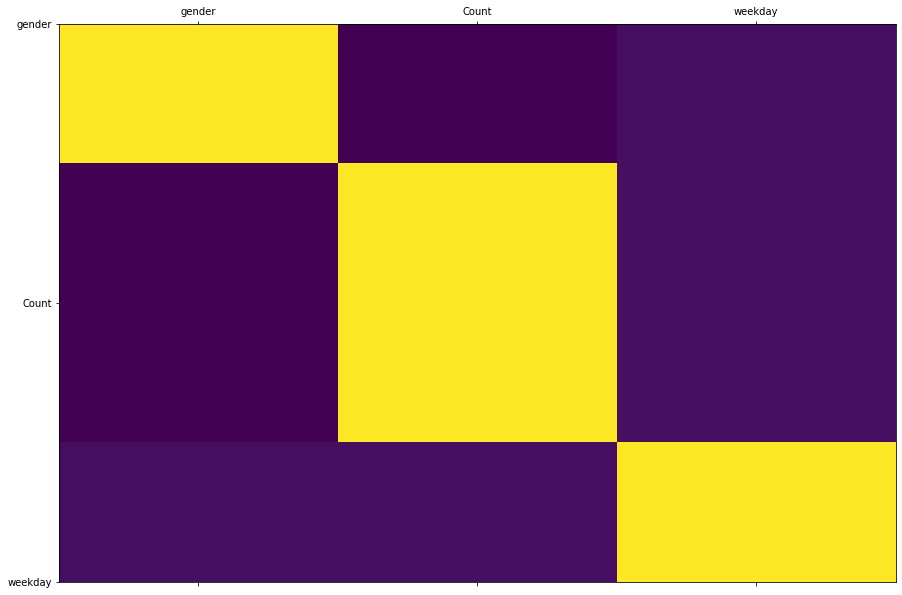

In [27]:

def plot_correlation(df_train, size=15):
    corr= df_train.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

plot_correlation(df_train)

In [38]:
#selecting our columns for the model

X = df_train[['Count', 'weekday']]
y = df_train.gender

In [39]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [40]:
#Modelling

models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM','GradientBoostingClassifier']

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))
models.append((GradientBoostingClassifier()))

accuracies = []

In [41]:
kfold = model_selection.KFold(n_splits=10,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score*100))
    
    y_pred = score.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

----------------------------------------
LR: 77.75510204081633
----------------------------------------
Random Forest: 77.61904761904762
----------------------------------------
Neural Network: 77.75510204081633
----------------------------------------
GaussianNB: 77.75510204081633
----------------------------------------
DecisionTreeClassifier: 77.61904761904762


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

----------------------------------------
SVM: 77.75510204081633
----------------------------------------
GradientBoostingClassifier: 77.75510204081633


In [48]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])